# Multiple linear regression 
- Assumptions in multiple regression 
- 1. Linearity: The relationship between the presictors and the response is linear
- 2. Independence: Observations are independent of each other
- 3. Homoscedasticity: The residuals (difference observes and predictes values) exhibit constant varience at all levels of the predictor
- 4. Normal Distrubution of Errors: The residuals of the model are normally distributed.
- 5. No Muticoll

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
# Rearrange the columns
cars = pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns
- MPG stands for milage of the car(Mile for Gallon)
- HP : Horse power of the car
- Vol : volume of the car(size)
- SP : Top speed of the car(miles for hour)
- WT : weight of the car(Pounds)

# EDA

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
# check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations
- There are no missing values
- There are 81 observations
- The data types of the columns are relevant and valid

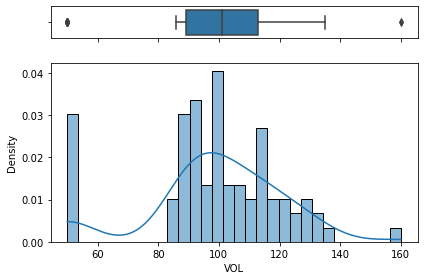

In [6]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='VOL',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='VOL',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

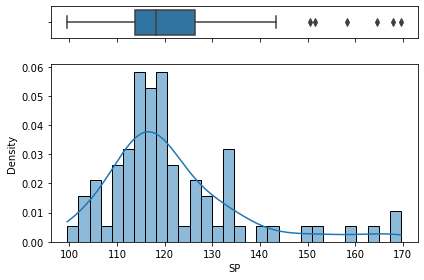

In [7]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

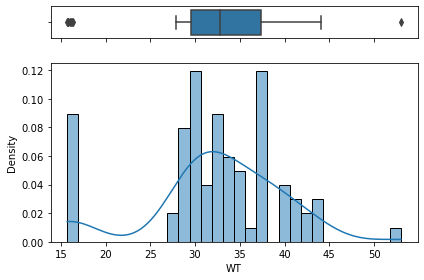

In [8]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='WT',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='WT',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

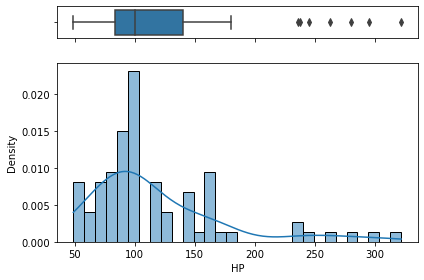

In [9]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

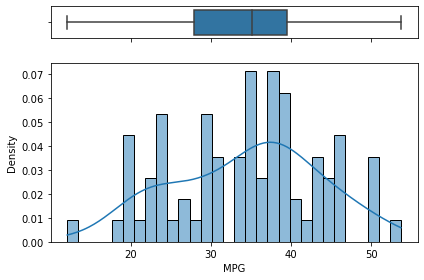

In [10]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='MPG',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='MPG',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

#### Observations
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns,a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars
- As this multi-dimensional data,the outliers with respect to sptial dimentions may have to be considered while building the regression model

In [11]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


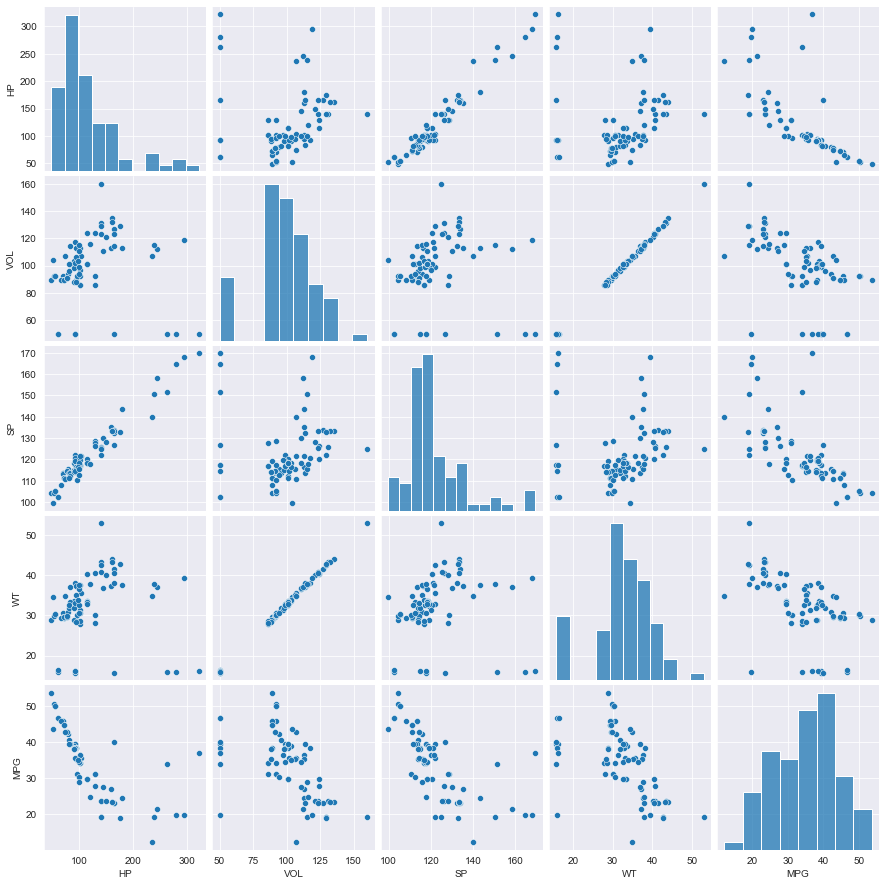

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [13]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


### Observations 
- The SP has highest correlation value in HP
- The VOL has second highest correlation value in HP
- The WT has third highest correlation value in HP
- Above diagonal VOL and WT are having highest correlation value
- Above diagonal VOL and SP are having Lowest correlation value

In [14]:
import statsmodels.formula.api as smf
model1=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:38:05   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""